In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.path as mpath
import cartopy.crs as ccrs
import math
import numpy.linalg

In [2]:
#Set the side of triangle
dx = 0.2
d_shift = dx / np.sqrt(2)
d_shift = round(d_shift, 4)

In [3]:
# If we know the coordinates of the corners in degrees:
x_left = 0
y_left = 30
p_left = np.array([x_left,y_left])

x_top = 20
y_top = 50
p_top = np.array([x_top,y_top])

x_right = 35
y_right = 35
p_right = np.array([x_right,y_right])

x_bottom = 15
y_bottom = 15
p_bottom = np.array([x_bottom,y_bottom])

total_x = np.sqrt(2)*(x_bottom - x_left)
total_y = np.sqrt(2)*(y_top - y_left)

In [4]:
total_x

21.213203435596427

In [5]:
Ly = np.sqrt((x_top- x_left)**2 + (y_top - y_left)**2)
Lx = np.sqrt((x_bottom - x_left)**2 + (y_bottom - y_left)**2)

In [6]:
lat = np.arange(0, )

In [7]:
rotated_grid = []
for i in range(nx):
    for j in range(ny):
        rotated_grid.append((i*dx, j*dx))

NameError: name 'nx' is not defined

In [8]:
#compute coordinates of grid 
grid_nodes = []

for i in range(int(total_x/dx)+1): 
#for i in range(10): 
    
        x = x_left + i * d_shift
        y = y_left - i * d_shift
        
        #while x < math.ceil((x_top + i*d_shift) and y < math.ceil((y_top - i*d_shift):
        while x <= (x_top + i*d_shift) and y <= (y_top - i*d_shift):
            grid_nodes += [(x,y)]
            #grid_nodes += [(round(x,4),round(y,4))]
            x += d_shift
            y += d_shift

In [9]:
# rotate rotated grid
rotated_grid_nodes = []
rotation_matrix = np.sqrt(2) / 2 * np.array([[1, -1], [1, 1]])
for node in grid_nodes:
    referenced_node = np.array([node[0], node[1] - 30])
    rotated_node = rotation_matrix.dot(referenced_node)
    rotated_grid_nodes.append(rotated_node)
    

In [39]:
len(grid_nodes)/800

18.9925

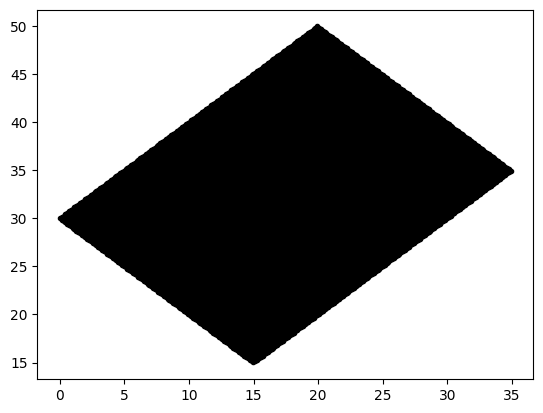

In [11]:
for xy in grid_nodes[:]:
    plt.plot(xy[0],xy[1], 'k.')
plt.show()

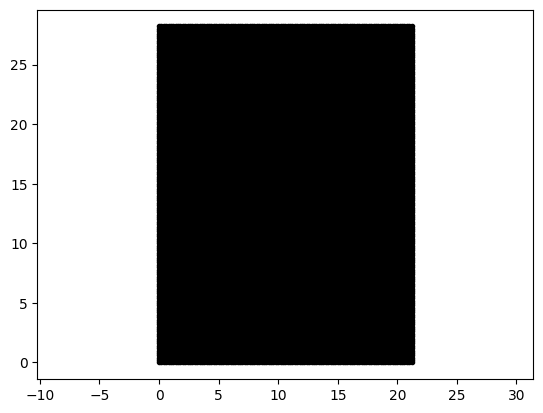

In [56]:
# !!LONG RUN, run just to check

for xy in rotated_grid:
    plt.plot(xy[0],xy[1], 'k.')
plt.axis('equal')
plt.show()

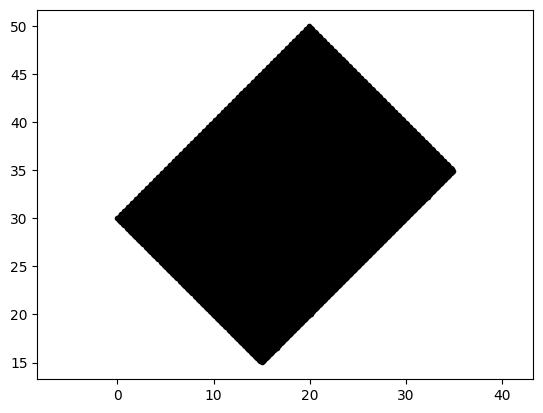

In [96]:
# !!LONG RUN, run just to check

#Plot western corner of the channel
for xy in grid_nodes:
    plt.plot(xy[0],xy[1], 'k.')

#for elemt in coords_elems[:10]:
#    plt.scatter(elemt[0], elemt[1], color='tab:blue')
plt.xlim([-1,1])
plt.ylim([29,31])
plt.axis('equal')
plt.show()

In [ ]:
grid_nodes[]

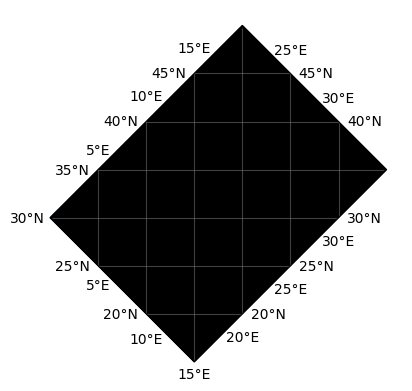

In [64]:
fig = plt.figure()
ax = fig.add_subplot(projection=ccrs.PlateCarree())
aoi = get_axes_contours(p_left, p_top, p_right, p_bottom, n=30)
ax.set_boundary(aoi, transform=ccrs.PlateCarree())

for xy in grid_nodes:
    plt.plot(xy[0],xy[1], 'k.')

for elemt in coords_elems[:10]:
    plt.scatter(elemt[0], elemt[1], color='tab:blue')

    
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), color='gray', alpha=0.5, rotate_labels=False)
gl.bottom_labels = True # not working, quite random
gl.top_labels = False # neither
#gl.xlabel_style = {'alpha':0} # hacky solve :)
gl.right_labels = False

In [59]:
def get_axes_contours(left_corner, top_corner, right_corner, bottom_corner, n=30):
    x_left, y_left = left_corner
    x_top, y_top = top_corner
    x_right, y_right = right_corner
    x_bottom, y_bottom = bottom_corner

    aoi = mpath.Path(
        list(zip(np.linspace(x_left, x_top, n), np.linspace(y_left, y_top, n))) + \
        list(zip(np.linspace(x_top, x_right, n), np.linspace(y_top, y_right, n))) + \
        list(zip(np.linspace(x_right, x_bottom, n), np.linspace(y_right, y_bottom, n))) + \
        list(zip(np.linspace(x_bottom, x_left, n), np.linspace(y_bottom, y_left, n)))
        )
    return aoi

29890

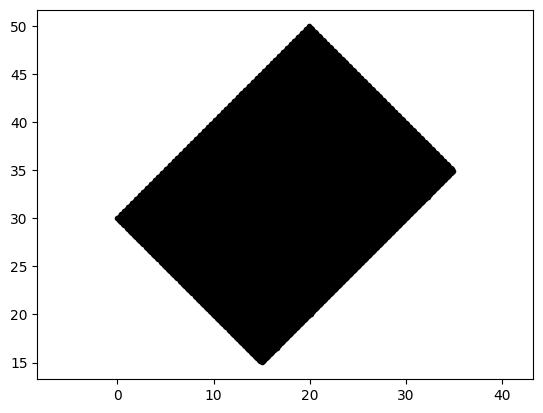

In [16]:
# !!LONG RUN, run just to check

#Plot northern corner of the channel
for xy in grid_nodes:
    plt.plot(xy[0],xy[1], 'k.')
plt.xlim([19,21])
plt.ylim([49,51])
plt.axis('equal')
plt.show()

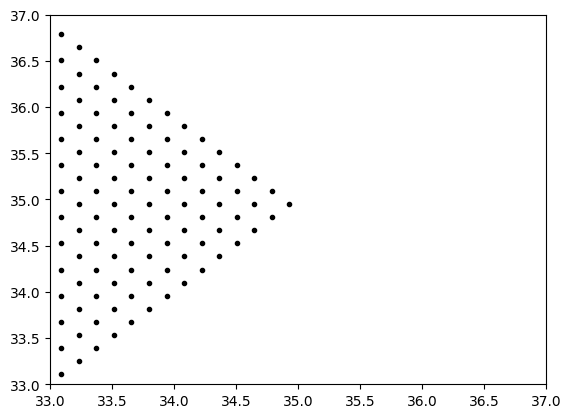

In [97]:
# !!LONG RUN, run just to check

#Plot eastern corner of the channel
for xy in grid_nodes:
    plt.plot(xy[0],xy[1], 'k.')

plt.xlim([33,37])
plt.ylim([33,37])
#lt.axis('equal')
plt.show()

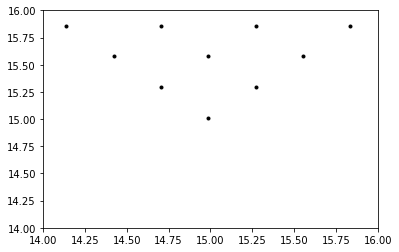

In [69]:
# !!LONG RUN, run just to check

#Plot southern corner of the channel
for xy in grid_nodes:
    plt.plot(xy[0],xy[1], 'k.')
plt.xlim([14,16])
plt.ylim([14,16])
#plt.axis('equal')
plt.show()

In [12]:
# create list of nodes:
nodenum = np.arange(len(grid_nodes)) + 1
nodenum_arr = nodenum.reshape(len(grid_nodes),1)
print(nodenum_arr)

[[    1]
 [    2]
 [    3]
 ...
 [15192]
 [15193]
 [15194]]


In [13]:
#reshape to the matrix structure
grid_nodes_array = np.array (grid_nodes)
grid_nodes_with_number = np.hstack((grid_nodes_array,nodenum_arr))
print (grid_nodes_with_number)
grid_nodes_3d = grid_nodes_with_number.reshape(int(total_x/dx)+1,int(total_y/dx)+1,3)


[[0.00000e+00 3.00000e+01 1.00000e+00]
 [1.41400e-01 3.01414e+01 2.00000e+00]
 [2.82800e-01 3.02828e+01 3.00000e+00]
 ...
 [3.46430e+01 3.46662e+01 1.51920e+04]
 [3.47844e+01 3.48076e+01 1.51930e+04]
 [3.49258e+01 3.49490e+01 1.51940e+04]]


array([[ 0.    , 30.    ],
       [ 0.1414, 30.1414],
       [ 0.2828, 30.2828],
       ...,
       [34.643 , 34.6662],
       [34.7844, 34.8076],
       [34.9258, 34.949 ]])

In [21]:
xy

(34.925800000000045, 34.94900000000005)

In [14]:
#these two nodes should be removed
print(grid_nodes_3d[0,int(total_y/dx),:])
print(grid_nodes_3d[int(total_x/dx),0,:])


[ 19.9374  49.9374 142.    ]
[1.49884e+01 1.50116e+01 1.50530e+04]


In [15]:
# updated version of glossary
nodsjk =  {1 : (0,1)}
jknods =  {(0,1) : 1}
nodx = np.zeros(shape=(len(grid_nodes)))
nody = np.zeros(shape=(len(grid_nodes)))
for i in range (0, int(total_y/dx)):
    
    nodx[i] = np.where(grid_nodes_3d[:,:,2] == i+1)[0]
    nody[i] = np.where(grid_nodes_3d[:,:,2] == i+1)[1]
    
    nodsjk.update({i+1 : ( int(nodx[i]), int(nody[i])) } )
    jknods.update( {( int(nodx[i]), int(nody[i])) : i+1 })

for i in range (int(total_y/dx)+1, len (grid_nodes)-int(total_y/dx)-1):
    
    nodx[i] = np.where(grid_nodes_3d[:,:,2] == i+1)[0]
    nody[i] = np.where(grid_nodes_3d[:,:,2] == i+1)[1]
    
    nodsjk.update({i : ( int(nodx[i]), int(nody[i])) } )
    jknods.update( {( int(nodx[i]), int(nody[i])) : i })

for i in range (len (grid_nodes)-int(total_y/dx), len (grid_nodes)):
    
    nodx[i] = np.where(grid_nodes_3d[:,:,2] == i+1)[0]
    nody[i] = np.where(grid_nodes_3d[:,:,2] == i+1)[1]
    
    nodsjk.update({i-1 : ( int(nodx[i]), int(nody[i])) } )
    jknods.update( {( int(nodx[i]), int(nody[i])) : i-1})


    

/tmp/ipykernel_52001/1664620224.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nodx[i] = np.where(grid_nodes_3d[:,:,2] == i+1)[0]
/tmp/ipykernel_52001/1664620224.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nody[i] = np.where(grid_nodes_3d[:,:,2] == i+1)[1]
/tmp/ipykernel_52001/1664620224.py:16: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  nodx[i] = np.where(grid_nodes_3d[:,:,2] == i+1)[0]
/tmp/ipykernel_52001/1664620224.py:17: DeprecationWarning: Conv

In [16]:
#Check if the reshaping is correct 
print (nodsjk[int(total_y/dx)])
print (nodsjk[int(total_y/dx)+1])
print (nodsjk[len (grid_nodes)-int(total_y/dx)-2])
print (nodsjk[len (grid_nodes)-int(total_y/dx)-1])
print (nodsjk[len (grid_nodes)-int(total_y/dx)])

(0, 140)
(1, 0)
(105, 141)
(106, 1)
(106, 2)


In [17]:
# if node on the boundary for line
def is_edge_line(xy, dx, p_left, p_top, p_right, p_bottom):
    on_edge=0
    if abs(np.cross(p_left-p_top, p_top-xy))/np.linalg.norm(p_left-p_top)<dx-0.001 or \
    abs(np.cross(p_left-p_bottom, p_bottom-xy))/np.linalg.norm(p_left-p_bottom)<dx-0.001 or \
    abs(np.cross(p_right-p_bottom, p_bottom-xy))/np.linalg.norm(p_right-p_bottom)<dx-0.001 or \
    abs(np.cross(p_right-p_top, p_top-xy))/np.linalg.norm(p_right-p_top)<dx-0.001: on_edge=1
    return on_edge

In [18]:
#Check for the border node 
is_edge_line(grid_nodes[len (grid_nodes)-int(total_y/dx)-1], dx, p_left, p_top, p_right, p_bottom)

1

In [19]:
# find 3 nodes for the corresponding triangle
elems = []
for n in range(1, len(grid_nodes)-1):
    i = nodsjk[n][0]
    j = nodsjk[n][1]
    
    i1 = i
    j1 = j+1
    if (i1,j1) in jknods.keys(): 
        n1 = jknods[ (i1,j1) ]
        
        i2 = i+1
        j2 = j+1
        if (i2,j2) in jknods.keys():
            n2 = jknods[ (i2,j2) ]
            
            elems += [(n,n1,n2)]
    
    i1 = i+1
    j1 = j
    if (i1,j1) in jknods.keys(): 
        n2 = jknods[ (i1,j1) ]
            
        i2 = i+1
        j2 = j+1
        if (i2,j2) in jknods.keys():
            n1 = jknods[ (i2,j2) ]
            
            elems += [(n,n1,n2)]
    
            

In [20]:
coords_elems = [((grid_nodes[i][0] + grid_nodes[j][0] + grid_nodes[k][0])/3, (grid_nodes[i][1] + grid_nodes[j][1] + grid_nodes[k][1])/3
                ) for i, j, k in elems]

In [21]:
grid_nodes[int(total_y/dx)]
grid_nodes.pop(int(total_y/dx))

(19.93740000000007, 49.93739999999967)

In [22]:
grid_nodes[len(grid_nodes)-int(total_y/dx)-1]
grid_nodes.pop(len(grid_nodes)-int(total_y/dx)-1)

(14.9884, 15.0116)

In [23]:
# write nodes to the files

f = open("nod2d.out", "w")
f.write( "%d\n" % len(grid_nodes))
for n in range(len(grid_nodes)):
    f.write( "%d   %.5f  %.5f  %d\n" % (n+1, grid_nodes[n][0], grid_nodes[n][1], is_edge_line(grid_nodes[n], dx, p_left, p_top, p_right, p_bottom) ) )
f.close() 

In [24]:
# write elements to the file
f = open("elem2d.out", "w")
f.write( "%d\n" % len(elems))
for n in range(len(elems)):
    f.write( "%d    %d    %d\n" % (elems[n][0],elems[n][1], elems[n][2]) )
f.close() 

In [25]:
#Set vertical depths
zbar=[0,\
9.03766,\
18.9791,\
29.9146,\
41.9438,\
55.1758,\
69.731,\
85.7418,\
103.354,\
122.727,\
144.037,\
167.478,\
193.264,\
221.628,\
252.828,\
287.149,\
324.901,\
366.429,\
412.11,\
462.358,\
517.632,\
578.433,\
645.314,\
718.883,\
799.809,\
888.827,\
986.747,\
1094.46,\
1212.94,\
1343.28,\
1486.64,\
1644.34,\
1817.81,\
2008.63,\
2218.53,\
2449.43,\
2703.41,\
2982.78,\
3290.1,\
3628.15,\
4000]

In [26]:
Nz = len(zbar)

In [27]:
f = open("aux3d.out", "w")
f.write( "%d\n" % Nz )
for z in zbar:
    f.write( "-%.5f\n" % z )
for n in range(len(nodsjk)):
    f.write( "-%.1f\n" % zbar[-1] )
f.close() 